### This is the supporting notebook containing the python codes for the presentation: "A Python implementation of Quantum Evolutionarily Stable Strategy Game, an interdisciplinary study of quantum computation and Game Theory in population biology" to be presented at SLAS 2019 international conference, to be held at Washington

### Quantum SimuPy

In [1]:
import numpy as np
import pandas as pd
import pylab
import random
import math

c=np.concatenate
o=np.outer

## Initialise the 1-Qubit system: {|0>, |1>}
Q0 = np.array([1., 0.])
Q1 = np.array([0., 1.])

## Initialise the 2-Qubit system: {|00>, |01>, |10>, |11>}
Q00 = c(o(Q0, Q0))
Q01 = c(o(Q0, Q1))
Q10 = c(o(Q1, Q0))
Q11 = c(o(Q1, Q1))

## 3-Qubit system: {|000>, |001>, |010>, |011>, |100>, |101>, |110>, |111>}
Q000 = c(o(Q00, Q0))
Q001 = c(o(Q00, Q1))
Q010 = c(o(Q01, Q0))
Q011 = c(o(Q01, Q1))
Q100 = c(o(Q10, Q0))
Q101 = c(o(Q10, Q1))
Q110 = c(o(Q11, Q0))
Q111 = c(o(Q11, Q1))

## 4-Qubit system
Q0000 = c(o(Q000, Q0))
Q0001 = c(o(Q000, Q1))
Q0010 = c(o(Q001, Q0))
Q0011 = c(o(Q001, Q1))
Q0100 = c(o(Q010, Q0))
Q0101 = c(o(Q010, Q1))
Q0110 = c(o(Q011, Q0))
Q0111 = c(o(Q011, Q1))
Q1000 = c(o(Q100, Q0))
Q1001 = c(o(Q100, Q1))
Q1010 = c(o(Q101, Q0))
Q1011 = c(o(Q101, Q1))
Q1100 = c(o(Q110, Q0))
Q1101 = c(o(Q110, Q1))
Q1110 = c(o(Q111, Q0))
Q1111 = c(o(Q111, Q1))

## 5-Qubit system
Q00000 = c(o(Q0000, Q0))
Q00001 = c(o(Q0000, Q1))
Q00010 = c(o(Q0001, Q0))
Q00011 = c(o(Q0001, Q1))
Q00100 = c(o(Q0010, Q0))
Q00101 = c(o(Q0010, Q1))
Q00110 = c(o(Q0011, Q0))
Q00111 = c(o(Q0011, Q1))
Q01000 = c(o(Q0100, Q0))
Q01001 = c(o(Q0100, Q1))
Q01010 = c(o(Q0101, Q0))
Q01011 = c(o(Q0101, Q1))
Q01100 = c(o(Q0110, Q0))
Q01101 = c(o(Q0110, Q1))
Q01110 = c(o(Q0111, Q0))
Q01111 = c(o(Q0111, Q1))
Q10000 = c(o(Q1000, Q0))
Q10001 = c(o(Q1000, Q1))
Q10010 = c(o(Q1001, Q0))
Q10011 = c(o(Q1001, Q1))
Q10100 = c(o(Q1010, Q0))
Q10101 = c(o(Q1010, Q1))
Q10110 = c(o(Q1011, Q0))
Q10111 = c(o(Q1011, Q1))
Q11000 = c(o(Q1100, Q0))
Q11001 = c(o(Q1100, Q1))
Q11010 = c(o(Q1101, Q0))
Q11011 = c(o(Q1101, Q1))
Q11100 = c(o(Q1110, Q0))
Q11101 = c(o(Q1110, Q1))
Q11110 = c(o(Q1111, Q0))
Q11111 = c(o(Q1111, Q1))

Dict={'0':Q0, '1':Q1, '00':Q00, '01':Q01, '10':Q10, '11':Q11, '000':Q000, '001':Q001, '010':Q010, '011':Q011, '100':Q100, '101':Q101, '110':Q110, '111':Q111, '0000':Q0000, '0001':Q0001, '0010':Q0010, '0011':Q0011, '0100':Q0100,
'0101':Q0101,
'0110':Q0110,
'0111':Q0111,
'1000':Q1000,
'1001':Q1001,
'1010':Q1010,
'1011':Q1011,
'1100':Q1100,
'1101':Q1101,
'1110':Q1110,
'1111':Q1111,
'00000':Q00000,
'00001':Q00001,
'00010':Q00010,
'00011':Q00011,
'00100':Q00100,
'00101':Q00101,
'00110':Q00110,
'00111':Q00111,
'01000':Q01000,
'01001':Q01001,
'01010':Q01010,
'01011':Q01011,
'01100':Q01100,
'01101':Q01101,
'01110':Q01110,
'01111':Q01111,
'10000':Q10000,
'10001':Q10001,
'10010':Q10010,
'10011':Q10011,
'10100':Q10100,
'10101':Q10101,
'10110':Q10110,
'10111':Q10111,
'11000':Q11000,
'11001':Q11001,
'11010':Q11010,
'11011':Q11011,
'11100':Q11100,
'11101':Q11101,
'11110':Q11110,
'11111':Q11111
}

## Diagonal basis
Q_plus=np.array([1, 1])/np.sqrt(2)
Q_minus=np.array([1, -1])/np.sqrt(2)

## Circular basis
Q_clock=np.array([1, 1j])/np.sqrt(2)
Q_anticlock=np.array([1, -1j])/np.sqrt(2)

## Identity matrices
I2 = np.identity(2)
I4 = np.identity(2**2)
I8 = np.identity(2**3)
I16 = np.identity(2**4)
I32 = np.identity(2**5)

# Define Gate operations
def PauliX(n): return np.array(([0., 1.], [1., 0.])).dot(n)
def PauliY(n): return np.array(([0., -1.0j], [1.0j, 0.])).dot(n)
def PauliZ(n): return np.array(([1., 0.], [0., -1.])).dot(n)

def Dagger(n): return np.conj(n).T

def Hadamard(n): return np.array(([1., 1.], [1., -1.])).dot(n)/np.sqrt(2)
def Hadamard4(n):
        """ This represents a 4X4 Hadamard Matrix, n is a 2-Qubit system """
        h=Hadamard(I2)
        x=c([h, h], axis=1)
        y=c([h, -h], axis=1)
        h4=c([x, y])
        return h4.dot(n)
def Hadamard8(n):
        """ This represents a 8X8 Hadamard Matrix, n is a 3-Qubit system """
        h4=Hadamard4(I4)
        x=c([h4, h4], axis=1)
        y=c([h4, -h4], axis=1)
        h8=c([x, y])
        return h8.dot(n)
def Hadamard16(n):
        """ This represents a 16X16 Hadamard Matrix, n is a 4-Qubit system """
        h8=Hadamard8(I8)
        x=c([h8, h8], axis=1)
        y=c([h8, -h8], axis=1)
        h16=c([x, y])
        return h16.dot(n)
def Hadamard32(n):
        """ This represents a 32X32 Hadamard Matrix, n is a 5-Qubit system """
        h16=Hadamard16(I16)
        x=c([h16, h16], axis=1)
        y=c([h16, -h16], axis=1)
        h32=c([x, y])
        return h32.dot(n)

def CNOT(n):
        """CNOT gate on 2-Qubit system with control qubit = 0 and target qubit = 1"""
        x=np.copy(I4)
        t=np.copy(x[2,])
        x[2,]=x[3,]
        x[3,]=t
        return x.dot(n)

def CNOT2_10(n):
        """CNOT gate on 2-Qubit system with control qubit = 1 and target qubit = 0"""
        H=Hadamard(I2)
        x=CNOT(I4)
        y=np.kron(H, H)
        return y.dot(x).dot(y).dot(n)
        
def CNOT3_01(n):
        """CNOT gate on 3-Qubit system with control qubit = 0 and target qubit = 1"""
        return (np.kron(CNOT(I4), I2)).dot(n)

def CNOT3_02(n):
        """CNOT gate on 3-Qubit system with control qubit = 0 and target qubit = 2"""
        return np.array(([1., 0., 0., 0., 0., 0., 0., 0.], [0., 1., 0., 0., 0., 0., 0., 0.], [0., 0., 1., 0., 0., 0., 0., 0.], [0., 0., 0., 1., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 1., 0., 0.], [0., 0., 0., 0., 1., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 0., 1.], [0., 0., 0., 0., 0., 0., 1., 0.])).dot(n)

def CNOT3_10(n):
        """CNOT gate on 3-Qubit system with control qubit = 1 and target qubit = 0"""
        return np.kron(CNOT2_10(I4), I2).dot(n)

def CNOT3_12(n):
        """CNOT gate on 3-Qubit system with control qubit = 1 and target qubit = 2"""
        return np.kron(I2, CNOT(I4)).dot(n)

def CNOT3_20(n):
        """CNOT gate on 3-Qubit system with control qubit = 2 and target qubit = 0"""
        return np.array(([1., 0., 0., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 1., 0., 0.], [0., 0., 1., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 0., 1.], [0., 0., 0., 0., 1., 0., 0., 0.], [0., 1., 0., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 1., 0.], [0., 0., 0., 1., 0., 0., 0., 0.])).dot(n)

def CNOT3_21(n):
        """CNOT gate on 3-Qubit system with control qubit = 2 and target qubit = 1"""
        return np.kron(I2, CNOT2_10(I4)).dot(n)

def CNOT4_12(n): return np.kron(CNOT3_12(I8), I2)
def CNOT5_12(n): return np.kron(CNOT4_12(I16), I2)

def PauliX_4(n):
        """ This represents the 4X4 pauliX matrix, with n as a 2-qubit system"""
        p=PauliX(I2)
        x=c([p, I2], axis=1)
        y=c([I2, p], axis=1)
        p4=c([x, y])
        return p4.dot(n)
def PauliY_4(n):
        """ This represents the 4X4 pauliY matrix, with n as a 2-qubit system"""
        p=PauliY(I2)
        x=c([p, -1j*I2], axis=1)
        y=c([1j*I2, p], axis=1)
        p4=c([x, y])
        return p4.dot(n)
def PauliZ_4(n):
        """ This represents the 4X4 pauliZ matrix, with n as a 2-qubit system"""
        p=PauliZ(I2)
        x=c([2*p, I2-I2], axis=1)
        y=c([I2-I2, -2*p], axis=1)
        p4=c([x, y])
        return p4.dot(n)

def cPauliY(n): return np.array(([1., 0., 0., 0.], [0., 1., 0., 0.], [0., 0., 0., -1.0j], [0., 0., 1.0j, 0.])).dot(n)
def cPauliZ(n): return np.array(([1., 0., 0., 0.], [0., 1., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., -1.])).dot(n)

def Rotate(n, t): return np.array(([np.cos(t), np.sin(t)], [-np.sin(t), np.cos(t)])).dot(n)

def Phase(n): return np.array(([1., 0.], [0., 1.0j])).dot(n)
def PhaseDagger(n): return np.array(([1., 0.], [0., -1.0j])).dot(n)
def T(n): return np.array(([1., 0.], [0., np.exp(1.0j*np.pi/4)])).dot(n)
def TDagger(n): return np.array(([1., 0.], [0., np.exp(-1.0j*np.pi/4)])).dot(n)

def R(n, Lambda): return np.array(([1., 0.], [0., exp(1j*Lambda)])).dot(n)

def SWAP(n):
        """n is a 4X4 matrix"""
        x=np.copy(I4)
        t=np.copy(x[1, ])
        x[1,]=x[2,]
        x[2,]=t
        return x.dot(n)
def Toffoli(n):
        """n must be a 8X8 matrix"""
        x=np.copy(I8)
        t=np.copy(x[6,])
        x[6,]=x[7,]
        x[7,]=t
        return x.dot(n)
def Fredkin(n):
        """n must be a 8X8 matrix"""
        x=np.copy(I8)
        t=np.copy(x[5,])
        x[5,]=x[6,]
        x[6,]=t
        return x.dot(n)
def Ising(n, phi):
        pi=np.pi
        e=np.exp
        return np.array(([1., 0., 0., e(1j*(phi-pi/2))], [0., 1., -1.0j, 0.], [0., -1.0j, 1., 0.], [e(1j*(-phi-pi/2)), 0., 0., 1.])).dot(n)

## Preparation of the Bell States: {|Beta_00>, |Beta_01>, |Beta_10>, |Beta_11>}
def bell(Qubit1, Qubit2):
        """Qubit1 and Qubit2 must be 0 or 1"""
        h=Hadamard(Q0) if Qubit1==0 else Hadamard(Q1)        
        x=c(o(h, Q1 if Qubit2==1 else Q0))
        return CNOT(x)
    
def Walsh(n): return Hadamard(n)

def Walsh4(n):
    h=Hadamard(I2)
    w=np.kron(h, h)
    return w.dot(n)

def Walsh8(n):
    h=Hadamard(I2)
    w=np.kron(np.kron(h, h), h)
    return w.dot(n)

def Walsh16(n):
    h=Hadamard(I2)
    w=np.kron(np.kron(np.kron(h, h), h), h)
    return w.dot(n)

def Walsh32(n):
    h=Hadamard(I2)
    w=np.kron(np.kron(np.kron(np.kron(h, h), h), h), h)
    return w.dot(n)

def QFT(y):
    """ For a given state |y> the quantum Fourier transform is calculated with QFT(y) """
    Y=bin(y)[2:]
    n=len(Y)
    return sum([np.exp(2*np.pi*1j*x*y/(2**n))*Dict['0'*(n-len(bin(x)[2:]))+bin(x)[2:]] for x in range(2**n)])/np.sqrt(2**n)

Beta_00=bell(0, 0)
Beta_01=bell(0, 1)
Beta_10=bell(1, 0)
Beta_11=bell(1, 1)

## An alternate way to prepare the bell states
def B(Qubit):
        H=Hadamard(I2)
        b=CNOT(np.kron(H, I2))
        return b.dot(Qubit)
b00=B(Q00)
b01=B(Q01)
b10=B(Q10)
b11=B(Q11)

def measure(n):
        l=len(n)
        n=pd.DataFrame(n)
        values=[]
        for i in range(l): values+=[abs(n.iloc[i][0])**2, ]
        p=pd.DataFrame(values).T
        if l==2: p.columns=["0", "1"]
        elif l==2**2: p.columns=["00", "01", "10", "11"]
        elif l==2**3: p.columns=["000","001","010","011","100","101","110","111"]
        elif l==2**4: p.columns=["0000","0001","0010","0011","0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","1110","1111"]
        else: p.columns=["00000","00001","00010","00011","00100","00101","00110","00111","01000","01001","01010","01011","01100","01101","01110","01111","10000","10001","10010","10011","10100","10101","10110","10111","11000","11001","11010","11011","11100","11101","11110","11111"]
        return p

def plot_measure(n):
        n.plot.bar()
        pylab.xlabel("Qubits")
        pylab.ylabel("Probabilitis")
        pylab.title("Probability Distribution")
        pylab.show()

In [2]:
def QPD(U_A, U_B, alpha, beta, gamma, delta):
    """Function that calculates the expectation value"""
    sigma_x=PauliX(I2)
    U=(np.kron(I2, I2)+1j*np.kron(sigma_x, sigma_x))/np.sqrt(2)
    U_dag=np.conj(U.T)

    initial=U.dot(Q00)
    
    PsiS=np.kron(U_A, U_B).dot(initial)
    PsiF=U_dag.dot(PsiS)
    plot_measure(measure(PsiF))
    
    cpsif=np.conj(PsiF.T)

    def pi(alpha, beta, gamma, delta): return (alpha*np.abs(cpsif.dot(Q00))**2+
    gamma*np.abs(cpsif.dot(Q01))**2+delta*np.abs(cpsif.dot(Q10))**2+
    beta*np.abs(cpsif.dot(Q11))**2, alpha*np.abs(cpsif.dot(Q00))**2+
    delta*np.abs(cpsif.dot(Q01))**2+gamma*np.abs(cpsif.dot(Q10))**2+
    beta*np.abs(cpsif.dot(Q11))**2) 

    return pi(alpha, beta, gamma, delta)

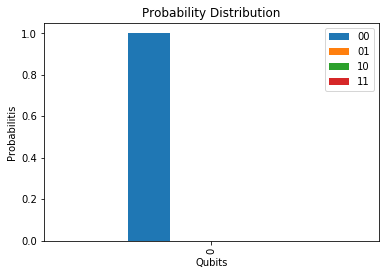

(2.9999999999999987, 2.9999999999999987)

In [5]:
sigma_z=PauliZ(I2)
QPD(sigma_z, sigma_z, 3, 1, 0, 5)

In [6]:
moves={1:I2, 2:PauliX(I2), 3:Hadamard(I2), 4:PauliZ(I2)}

def QPD2(U_A, U_B, alpha, beta, gamma, delta):
    # Symmetric bimatrix game
    sigma_x=PauliX(I2)
    U=(np.kron(I2, I2)+1j*np.kron(sigma_x, sigma_x))/np.sqrt(2)
    U_dag=np.conj(U.T)

    initial=U.dot(Q00)
    
    PsiS=np.kron(U_A, U_B).dot(initial)
    PsiF=U_dag.dot(PsiS)    
    cpsif=np.conj(PsiF.T)

    def pi(alpha, beta, gamma, delta): return (alpha*np.abs(cpsif.dot(Q00))**2+
    gamma*np.abs(cpsif.dot(Q01))**2+delta*np.abs(cpsif.dot(Q10))**2+
    beta*np.abs(cpsif.dot(Q11))**2, alpha*np.abs(cpsif.dot(Q00))**2+
    delta*np.abs(cpsif.dot(Q01))**2+gamma*np.abs(cpsif.dot(Q10))**2+
    beta*np.abs(cpsif.dot(Q11))**2) 

    return pi(alpha, beta, gamma, delta)

def payoff_matrix_QPD(alpha, beta, gamma, delta):
    Alice=np.zeros([4, 4])
    Bob=np.zeros([4, 4])
    for i in range(1, 5):
        for j in range(1, 5):
            X=QPD2(moves[i], moves[j], alpha, beta, gamma, delta)
            Alice[i-1, j-1], Bob[i-1, j-1]=X[0], X[1]
    
    return(Alice, Bob)
payoff_matrix_QPD(3, 1, 0, 5)

(array([[3.  , 0.  , 0.5 , 1.  ],
        [5.  , 1.  , 0.5 , 0.  ],
        [3.  , 3.  , 2.25, 1.5 ],
        [1.  , 5.  , 4.  , 3.  ]]), array([[3.  , 5.  , 3.  , 1.  ],
        [0.  , 1.  , 3.  , 5.  ],
        [0.5 , 0.5 , 2.25, 4.  ],
        [1.  , 0.  , 1.5 , 3.  ]]))

In [7]:
L=payoff_matrix_QPD(3, 1, 0, 5)
L1=[]
L2=[]
for i in range(4):
    a=L[0][:, i]
    M=max(a)
    for j in range(4):
        if a[j]==M: L1+=[[j, i], ]

for i in range(4):
    a=L[1][i, :]
    M=max(a)
    for j in range(4):
        if a[j]==M: L2+=[[i, j], ]

N=[i for i in L1 if i in L2]

I1={0:'I', 1:'sigma_x', 2:'H', 3:'sigma_z'}
I2={0:'I', 1:'sigma_x', 2:'H', 3:'sigma_z'}

Nash=[(I1[i], I2[j]) for [i, j] in N]
## The Nash equilibria
Nash

[('sigma_z', 'sigma_z')]

### The asymmetric bimatrix game

In [14]:
def QPD3(U_A, U_B, alpha, beta, gamma):
    # asymmetric bimatrix game
    sigma_x=PauliX(I2)
    U=(np.kron(I2, I2)+1j*np.kron(sigma_x, sigma_x))/np.sqrt(2)
    U_dag=np.conj(U.T)

    initial=U.dot(Q00)
    
    PsiS=np.kron(U_A, U_B).dot(initial)
    PsiF=U_dag.dot(PsiS)    
    cpsif=np.conj(PsiF.T)
    plot_measure(measure(PsiF))

    def pi(alpha, beta, gamma): return (alpha*np.abs(cpsif.dot(Q00))**2+
    gamma*np.abs(cpsif.dot(Q01))**2+gamma*np.abs(cpsif.dot(Q10))**2+
    beta*np.abs(cpsif.dot(Q11))**2, beta*np.abs(cpsif.dot(Q00))**2+
    gamma*np.abs(cpsif.dot(Q01))**2+gamma*np.abs(cpsif.dot(Q10))**2+
    alpha*np.abs(cpsif.dot(Q11))**2) 

    return pi(alpha, beta, gamma)

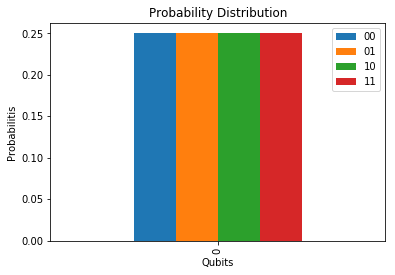

(0.9999999999999993, 0.9999999999999993)

In [15]:
H=Hadamard(I2)
QPD3(H, H, 3, 1, 0)

In [17]:
def QPD4(U_A, U_B, alpha, beta, gamma):
    # asymmetric bimatrix game
    sigma_x=PauliX(I2)
    U=(np.kron(I2, I2)+1j*np.kron(sigma_x, sigma_x))/np.sqrt(2)
    U_dag=np.conj(U.T)

    initial=U.dot(Q00)
    
    PsiS=np.kron(U_A, U_B).dot(initial)
    PsiF=U_dag.dot(PsiS)    
    cpsif=np.conj(PsiF.T)

    def pi(alpha, beta, gamma): return (alpha*np.abs(cpsif.dot(Q00))**2+
    gamma*np.abs(cpsif.dot(Q01))**2+gamma*np.abs(cpsif.dot(Q10))**2+
    beta*np.abs(cpsif.dot(Q11))**2, beta*np.abs(cpsif.dot(Q00))**2+
    gamma*np.abs(cpsif.dot(Q01))**2+gamma*np.abs(cpsif.dot(Q10))**2+
    alpha*np.abs(cpsif.dot(Q11))**2) 

    return pi(alpha, beta, gamma)

def payoff_matrix_QPD2(alpha, beta, gamma):
    Alice=np.zeros([4, 4])
    Bob=np.zeros([4, 4])
    for i in range(1, 5):
        for j in range(1, 5):
            X=QPD4(moves[i], moves[j], alpha, beta, gamma)
            Alice[i-1, j-1], Bob[i-1, j-1]=X[0], X[1]
    
    return(Alice, Bob)
payoff_matrix_QPD2(3, 1, 0)

(array([[3. , 0. , 0.5, 1. ],
        [0. , 1. , 0.5, 0. ],
        [0.5, 0.5, 1. , 1.5],
        [1. , 0. , 1.5, 3. ]]), array([[1. , 0. , 1.5, 3. ],
        [0. , 3. , 1.5, 0. ],
        [1.5, 1.5, 1. , 0.5],
        [3. , 0. , 0.5, 1. ]]))

In [19]:
L=payoff_matrix_QPD2(3, 1, 0)
L1=[]
L2=[]
for i in range(4):
    a=L[0][:, i]
    M=max(a)
    for j in range(4):
        if a[j]==M: L1+=[[j, i], ]

for i in range(4):
    a=L[1][i, :]
    M=max(a)
    for j in range(4):
        if a[j]==M: L2+=[[i, j], ]

N=[i for i in L1 if i in L2]

I1={0:'I', 1:'sigma_x', 2:'H', 3:'sigma_z'}
I2={0:'I', 1:'sigma_x', 2:'H', 3:'sigma_z'}

Nash=[(I1[i], I2[j]) for [i, j] in N]
## The Nash equilibria
Nash

[('sigma_x', 'sigma_x')]